# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df["trip_type"].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [9]:
book=df[df['booking_complete'] == 1]

In [10]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


# Me quedaré sólo con datos que pueden importarme


In [11]:
hola=df.select_dtypes(include='number')
hola.groupby("booking_complete").mean()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
booking_complete,,,,,,,,,
0,1.580923,85.779926,23.647218,9.050162,3.820258,0.655331,0.287357,0.421641,7.344266
1,1.649906,80.167157,19.617679,9.158331,3.781225,0.745253,0.351565,0.458411,6.898258


In [12]:
df= df.drop(["num_passengers","sales_channel","trip_type"], axis=1)

In [13]:
paises = pd.read_csv("paises.csv")
paises= paises.iloc[:,:2]
paises

,Country/Economy,Income group
0,Afghanistan,Low income
1,Albania,Upper middle income
2,Algeria,Lower middle income
3,American Samoa,Upper middle income
4,Andorra,High income
...,...,...
260,Sub-Saharan Africa,NaN
261,Sub-Saharan Africa (excluding high income),NaN
262,Sub-Saharan Africa (IDA & IBRD),NaN
263,Upper middle income,NaN


In [14]:
import re

def clean_text(text):
    # Verificar si el valor es un texto
    if isinstance(text, str):
        # Convertir a minúsculas
        text = text.lower()
        
        # Eliminar caracteres especiales excepto letras, números y espacios
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
        # Reemplazar espacios por guiones bajos
        text = text.replace(' ', '_')
    
    return text

# Aplicar la función a las columnas deseadas
paises['Country/Economy'] = paises['Country/Economy'].apply(clean_text)
paises['Income group'] = paises['Income group'].apply(clean_text)
df["booking_origin"]= df["booking_origin"].apply(clean_text)

In [15]:
df

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,262,19,7,6,AKLDEL,new_zealand,1,0,0,5.52,0
1,112,20,3,6,AKLDEL,new_zealand,0,0,0,5.52,0
2,243,22,17,3,AKLDEL,india,1,1,0,5.52,0
3,96,31,4,6,AKLDEL,new_zealand,0,0,1,5.52,0
4,68,22,15,3,AKLDEL,india,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,27,6,9,6,PERPNH,australia,1,0,1,5.62,0
49996,111,6,4,7,PERPNH,australia,0,0,0,5.62,0
49997,24,6,22,6,PERPNH,australia,0,0,1,5.62,0
49998,15,6,11,1,PERPNH,australia,1,0,1,5.62,0


In [16]:
si=pd.merge(df, paises, left_on='booking_origin', right_on='Country/Economy')
si

,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Country/Economy,Income group
0,262,19,7,6,AKLDEL,new_zealand,1,0,0,5.52,0,new_zealand,high_income
1,112,20,3,6,AKLDEL,new_zealand,0,0,0,5.52,0,new_zealand,high_income
2,96,31,4,6,AKLDEL,new_zealand,0,0,1,5.52,0,new_zealand,high_income
3,3,48,20,4,AKLDEL,new_zealand,1,0,1,5.52,0,new_zealand,high_income
4,201,33,6,4,AKLDEL,new_zealand,1,0,1,5.52,0,new_zealand,high_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42361,97,6,11,2,AKLKUL,iraq,1,0,1,8.83,1,iraq,upper_middle_income
42362,38,6,22,2,HKTPER,ghana,1,1,1,5.62,0,ghana,lower_middle_income
42363,166,6,23,4,HNDPEN,gibraltar,0,1,1,7.57,0,gibraltar,high_income
42364,22,6,18,6,ICNPEN,guatemala,1,1,0,6.62,0,guatemala,upper_middle_income


In [17]:
si = pd.get_dummies(si, columns=['Income group'],dtype=int)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
import category_encoders as ce


In [20]:
tenc=ce.TargetEncoder() 
df_city=tenc.fit_transform(si['route'],si['booking_complete'])
df_city

,route
0,0.077244
1,0.077244
2,0.077244
3,0.077244
4,0.077244
...,...
42361,0.212373
42362,0.076453
42363,0.218679
42364,0.426966


In [21]:
df_new = df_city.join(si.drop('route',axis = 1))
df_new

,route,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Country/Economy,Income group_high_income,Income group_low_income,Income group_lower_middle_income,Income group_upper_middle_income
0,0.077244,262,19,7,6,new_zealand,1,0,0,5.52,0,new_zealand,1,0,0,0
1,0.077244,112,20,3,6,new_zealand,0,0,0,5.52,0,new_zealand,1,0,0,0
2,0.077244,96,31,4,6,new_zealand,0,0,1,5.52,0,new_zealand,1,0,0,0
3,0.077244,3,48,20,4,new_zealand,1,0,1,5.52,0,new_zealand,1,0,0,0
4,0.077244,201,33,6,4,new_zealand,1,0,1,5.52,0,new_zealand,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42361,0.212373,97,6,11,2,iraq,1,0,1,8.83,1,iraq,0,0,0,1
42362,0.076453,38,6,22,2,ghana,1,1,1,5.62,0,ghana,0,0,1,0
42363,0.218679,166,6,23,4,gibraltar,0,1,1,7.57,0,gibraltar,1,0,0,0
42364,0.426966,22,6,18,6,guatemala,1,1,0,6.62,0,guatemala,0,0,0,1


In [22]:
df_new = df_new.drop(["booking_origin","Country/Economy"], axis=1)
df_new

,route,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Income group_high_income,Income group_low_income,Income group_lower_middle_income,Income group_upper_middle_income
0,0.077244,262,19,7,6,1,0,0,5.52,0,1,0,0,0
1,0.077244,112,20,3,6,0,0,0,5.52,0,1,0,0,0
2,0.077244,96,31,4,6,0,0,1,5.52,0,1,0,0,0
3,0.077244,3,48,20,4,1,0,1,5.52,0,1,0,0,0
4,0.077244,201,33,6,4,1,0,1,5.52,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42361,0.212373,97,6,11,2,1,0,1,8.83,1,0,0,0,1
42362,0.076453,38,6,22,2,1,1,1,5.62,0,0,0,1,0
42363,0.218679,166,6,23,4,0,1,1,7.57,0,1,0,0,0
42364,0.426966,22,6,18,6,1,1,0,6.62,0,0,0,0,1


In [23]:
df_new.describe()

,route,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Income group_high_income,Income group_low_income,Income group_lower_middle_income,Income group_upper_middle_income
count,4.236600e+04,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000,42366.000000
mean,1.539757e-01,85.203583,23.982887,9.055516,3.833263,0.674007,0.307393,0.432139,7.411118,0.154487,0.591795,0.000024,0.108696,0.299485
std,1.050161e-01,91.302071,33.789542,5.454085,1.994849,0.468750,0.461419,0.495379,1.480161,0.361419,0.491507,0.004858,0.311261,0.458038
min,9.565914e-10,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.628788e-02,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.401893e-01,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.123727e-01,116.000000,29.000000,13.000000,6.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,0.000000,0.000000,1.000000
max,4.920715e-01,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_new = df_new[df_new['length_of_stay'] <= 365]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e554eb520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e554eba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e554eb280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e554ebfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e554fd280>],
 'means': []}

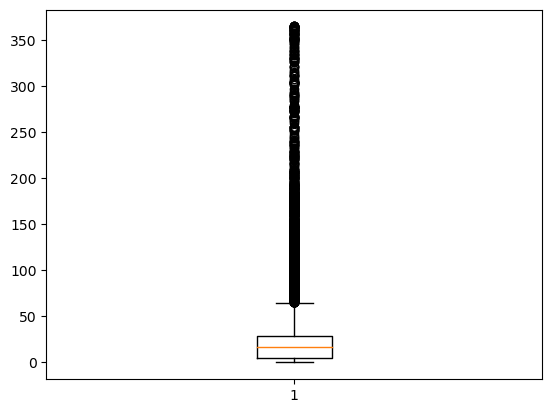

In [25]:
plt.boxplot(df_new["length_of_stay"])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop('booking_complete', axis=1)
y = df_new['booking_complete']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Precisión en el conjunto de prueba: {:.2f}".format(accuracy))
print("Precisión en el conjunto de prueba: {:.2f}".format(precision))
print("Recall en el conjunto de prueba: {:.2f}".format(recall))
print("F1-score en el conjunto de prueba: {:.2f}".format(f1))

Precisión en el conjunto de prueba: 0.85
Precisión en el conjunto de prueba: 0.55
Recall en el conjunto de prueba: 0.14
F1-score en el conjunto de prueba: 0.23


In [28]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion)


Matriz de Confusión:
[[6972  157]
 [1148  193]]


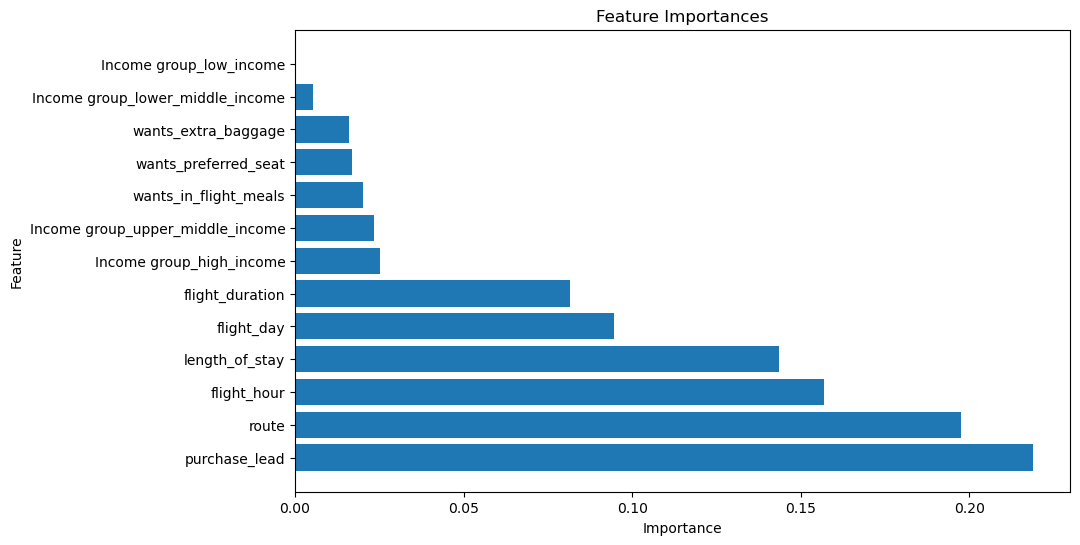

In [29]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características
importances = rf.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con las importancias y los nombres de las características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia en orden descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de las características en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_new.drop('booking_complete', axis=1)
y = df_new['booking_complete']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convertir los datos al formato específico de XGBoost (DMatrix)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los parámetros del modelo
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3
}

# Entrenar el modelo de Gradient Boosting
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precisión del modelo: {:.2f}".format(accuracy))
print("Recall en el conjunto de prueba: {:.2f}".format(recall))
print("Precisión en el conjunto de prueba: {:.2f}".format(precision))
print("F1-score en el conjunto de prueba: {:.2f}".format(f1))

Precisión del modelo: 0.85
Recall en el conjunto de prueba: 0.04
Precisión en el conjunto de prueba: 0.54
F1-score en el conjunto de prueba: 0.08


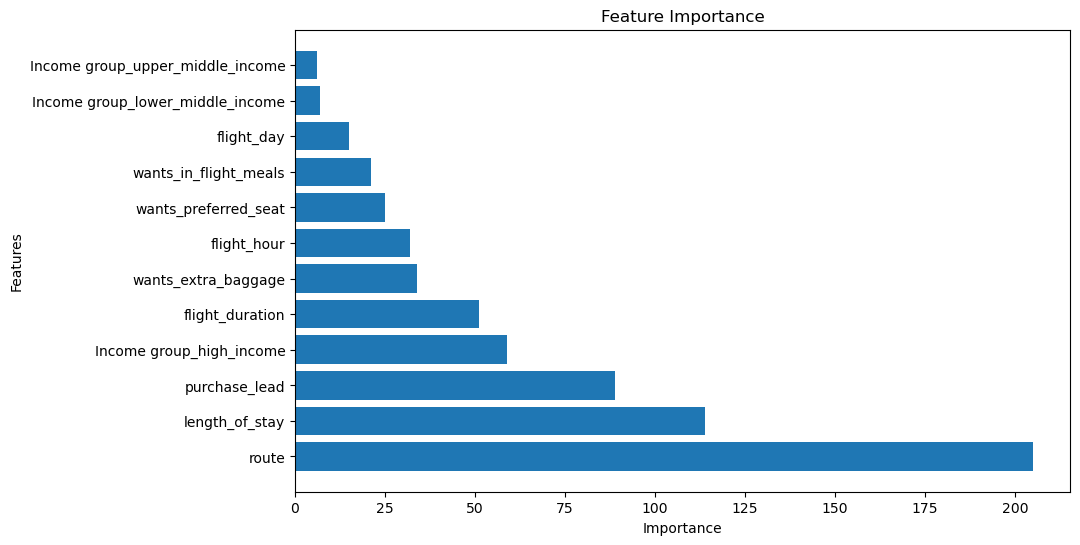

In [31]:
model = xgb.train(params, dtrain, num_rounds)

# Obtener la importancia de las características
importance = model.get_score(importance_type='weight')

# Ordenar la importancia de las características en orden descendente
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extraer los nombres de las características y sus valores de importancia
feature_names = [feature for feature, _ in sorted_importance]
feature_importance = [score for _, score in sorted_importance]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop('booking_complete', axis=1)
y = df_new['booking_complete']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Support Vector Machines
svm = SVC()

# Entrenar el modelo
svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Imprimir las métricas de evaluación
print("Precisión: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Precisión: 0.85
Precision: 0.00
Recall: 0.00
F1-score: 0.00


In [33]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo con los datos balanceados
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Precisión en el conjunto de prueba: {:.2f}".format(accuracy))
print("Precisión en el conjunto de prueba: {:.2f}".format(precision))
print("Recall en el conjunto de prueba: {:.2f}".format(recall))
print("F1-score en el conjunto de prueba: {:.2f}".format(f1))
    

Precisión en el conjunto de prueba: 0.82
Precisión en el conjunto de prueba: 0.40
Recall en el conjunto de prueba: 0.29
F1-score en el conjunto de prueba: 0.34


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop('booking_complete', axis=1)
y = df_new['booking_complete']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combinar las características y la variable objetivo en un solo DataFrame
df_train = X_train.join(y_train)

# Separar los datos de la clase positiva y negativa
df_positive = df_train[df_train['booking_complete'] == 1]
df_negative = df_train[df_train['booking_complete'] == 0]

# Aplicar la técnica de duplicación de muestras a la clase minoritaria (clase 1)
df_positive_upsampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

# Combinar los datos balanceados
df_balanced = pd.concat([df_negative, df_positive_upsampled])

# Separar las características y la variable objetivo nuevamente
X_train_balanced = df_balanced.drop('booking_complete', axis=1)
y_train_balanced = df_balanced['booking_complete']

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Entrenar el modelo con los datos balanceados
rf.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Precisión en el conjunto de prueba: {:.2f}".format(accuracy))
print("Precisión en el conjunto de prueba: {:.2f}".format(precision))
print("Recall en el conjunto de prueba: {:.2f}".format(recall))
print("F1-score en el conjunto de prueba: {:.2f}".format(f1))


Precisión en el conjunto de prueba: 0.84
Precisión en el conjunto de prueba: 0.45
Recall en el conjunto de prueba: 0.26
F1-score en el conjunto de prueba: 0.33


In [35]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion)


Matriz de Confusión:
[[6778  417]
 [ 938  337]]


In [36]:

######ESTE ES EL BUENO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop('booking_complete', axis=1)
y = df_new['booking_complete']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combinar las características y la variable objetivo en un solo DataFrame
df_train = X_train.join(y_train)

# Separar los datos de la clase positiva y negativa
df_positive = df_train[df_train['booking_complete'] == 1]
df_negative = df_train[df_train['booking_complete'] == 0]

# Aplicar la técnica de eliminación aleatoria de muestras a la clase mayoritaria (clase 0)
df_negative_downsampled = resample(df_negative, replace=False, n_samples=len(df_positive), random_state=42)

# Combinar los datos balanceados
df_balanced = pd.concat([df_negative_downsampled, df_positive])

# Separar las características y la variable objetivo nuevamente
X_train_balanced = df_balanced.drop('booking_complete', axis=1)
y_train_balanced = df_balanced['booking_complete']

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Entrenar el modelo con los datos balanceados
rf.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Precisión en el conjunto de prueba: {:.2f}".format(accuracy))
print("Precisión en el conjunto de prueba: {:.2f}".format(precision))
print("Recall en el conjunto de prueba: {:.2f}".format(recall))
print("F1-score en el conjunto de prueba: {:.2f}".format(f1))


Precisión en el conjunto de prueba: 0.69
Precisión en el conjunto de prueba: 0.29
Recall en el conjunto de prueba: 0.72
F1-score en el conjunto de prueba: 0.42


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Realizar la validación cruzada
scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Precisión promedio en la validación cruzada: {:.2f}".format(scores.mean()))


Precisión promedio en la validación cruzada: 0.70


In [38]:
scores

array([0.6974629 , 0.70272858, 0.68247126, 0.68390805, 0.71743295])

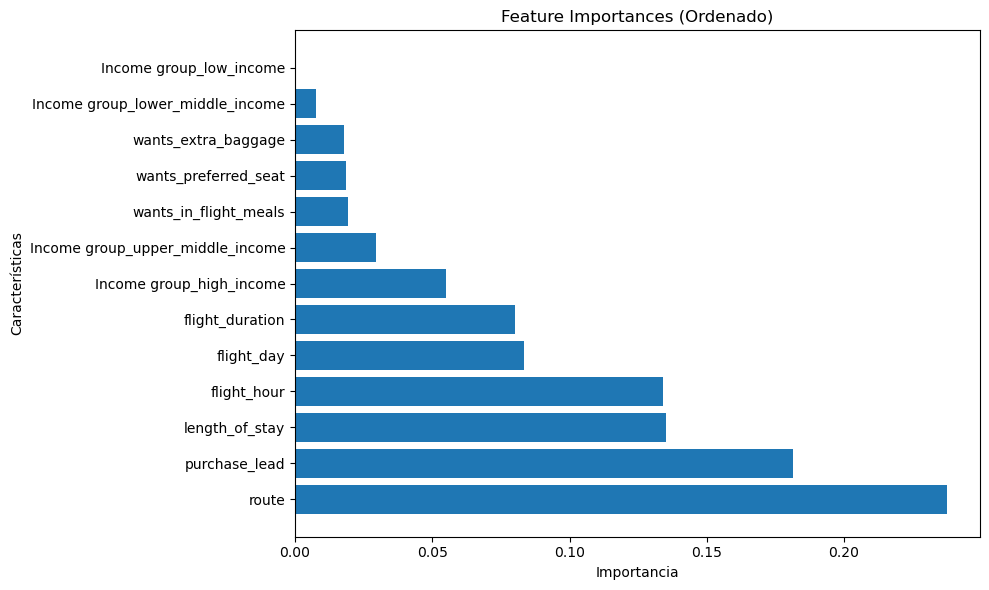

In [39]:
import matplotlib.pyplot as plt

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Entrenar el modelo con los datos balanceados
rf.fit(X_train_balanced, y_train_balanced)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Obtener el nombre de las características
feature_names = X_train_balanced.columns

# Combinar características e importancias
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Separar importancias y nombres de características ordenados
sorted_importances = [importance for importance, _ in feature_importances]
sorted_feature_names = [feature_name for _, feature_name in feature_importances]

# Crear un gráfico de barras horizontal para visualizar las feature importances ordenadas
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances)
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Feature Importances (Ordenado)')
plt.tight_layout()
plt.show()


In [43]:
feature_importances

[(0.23765526216479807, 'route'),
 (0.1814644235844697, 'purchase_lead'),
 (0.13523426067412297, 'length_of_stay'),
 (0.13409370101429652, 'flight_hour'),
 (0.08333578335724887, 'flight_day'),
 (0.08010615549864626, 'flight_duration'),
 (0.054990874580035196, 'Income group_high_income'),
 (0.029653847120651187, 'Income group_upper_middle_income'),
 (0.019475487471752945, 'wants_in_flight_meals'),
 (0.01852003480276818, 'wants_preferred_seat'),
 (0.017829352163321606, 'wants_extra_baggage'),
 (0.0076408175678884475, 'Income group_lower_middle_income'),
 (0.0, 'Income group_low_income')]

In [41]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion)


Matriz de Confusión:
[[4859 2293]
 [ 366  952]]


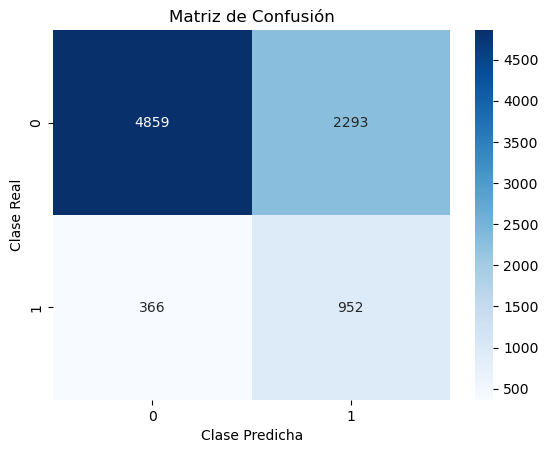

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtener las etiquetas de las clases
labels = np.unique(y_test)

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Configurar etiquetas y título del gráfico
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


Accuracy: Que tan bien clasifica las muestras en general. Problemas cuando hay desbalance de clases

Precision: Que tan precisas son las predicciones positivas del modelo.Cuantas predicciones positivas son realmene positivas
 True Positives / (True Positives + False Positives)

Recall: Qué tan bien el modelo puede identificar correctamente las muestras positivas. Identificar tooooodos los casos positivos. True Positives / (True Positives + False Negatives)

F1: Falsos positivos y falsos negativos. 